## EDA 
### Section 1: Summary Statistics and Distributions:

#### 1. Calculate basic summary statistics 
(mean, median, mode, standard deviation) for numerical columns like loan_amnt, annual_inc, etc.
Create histograms and box plots to visualize the distribution of loan amounts, annual income, and other key variables.
Calculate and visualize the percentage of loans that were fully repaid (loan_status) versus those that defaulted.
#### 2. Categorical Variables Analysis:
Explore the distribution of categorical variables like home_ownership, purpose, and verification_status.
Calculate the count and percentage of loans for each category within these variables.
Visualize these distributions using bar plots or pie charts.

#### 3. Time-Series Analysis:
Convert date columns (issue_d, last_pymnt_d, etc.) to datetime objects.
Create a time-series plot of loan issuance over time to identify trends.
Analyze loan performance over time, such as the percentage of loans that default or are paid off.

### Section 2: Advanced and Interesting EDA Activities:
#### 1. Loan Default Analysis by Features:

Perform a deeper analysis of loan defaults by exploring relationships between default rates and features like int_rate, emp_length, dti, and annual_inc.
Use statistical tests or visualizations to identify significant differences in default rates among different groups.

#### 2. Feature Engineering and Correlation Analysis:
Create new features or transformations based on domain knowledge, such as debt-to-income ratio (dti) or loan-to-income ratio.
Compute correlations between features and the target variable (repay_fail) to identify which features are most influential in loan repayment.

#### 3. Geospatial Analysis:
Utilize geographical information such as zip_code and addr_state to perform geospatial analysis.
Visualize loan distribution and loan performance on a map to identify geographic trends and hotspots.
Analyze whether the location has an impact on loan defaults or interest rates.

IMPORTING LIBRARIES

In [214]:
import pandas as pd
import matplotlib.pyplot as plt

LOADING DATASET

In [215]:
try:
    df = pd.read_csv('data\data.csv', encoding='iso-8859-1')
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")


PREVIEWING DATASET

In [216]:
pd.set_option('display.max_columns', None) # This ensures that jupyter notebook shows all columns 
df.head(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
0,2,2,2,0.0,0.0,0.0,36 months,0.00,0.00,< 1 year,RENT,0.0,Not Verified,Dec-99,Charged Off,major_purchase,000xx,ZZ,0.00,0.0,Jan-01,0.0,NaN,0.0,0.0,0.0,0.00%,1.0,0.000000,0.00,0.00,0.00,Jan-07,0.00,Jan-07,Jan-07,1
1,3,545583,703644,2500.0,2500.0,2500.0,36 months,13.98,85.42,4 years,RENT,20004.0,Not Verified,Jul-10,Does not meet the credit policy. Status:Fully ...,other,487xx,MI,19.86,0.0,Aug-05,5.0,NaN,7.0,0.0,981.0,21.30%,10.0,3075.291779,3075.29,2500.00,575.29,Jul-13,90.85,Aug-13,Jun-16,0
2,4,532101,687836,5000.0,5000.0,5000.0,36 months,15.95,175.67,4 years,RENT,59000.0,Not Verified,Jun-10,Charged Off,debt_consolidation,115xx,NY,19.57,0.0,Apr-94,1.0,59.0,7.0,0.0,18773.0,99.90%,15.0,2948.760000,2948.76,1909.02,873.81,Nov-11,175.67,NaN,Mar-12,1


In [217]:
df.tail(3)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,repay_fail
38477,38478,519553,671637,16000.0,10550.0,10531.35818,60 months,14.96,250.77,10+ years,MORTGAGE,95088.0,Source Verified,May-10,Fully Paid,debt_consolidation,073xx,NJ,10.63,0.0,Dec-95,1.0,NaN,9.0,1.0,10386.0,62.20%,25.0,14202.267530,14163.31,10550.0,3652.27,Jun-13,5439.96,NaN,Feb-16,0
38478,38479,825638,1034448,10000.0,10000.0,10000.00000,36 months,16.89,355.99,1 year,RENT,48720.0,Not Verified,Jul-11,Fully Paid,debt_consolidation,061xx,CT,18.97,0.0,Jul-07,2.0,NaN,8.0,0.0,7301.0,53.30%,12.0,12815.178320,12815.18,10000.0,2815.18,Aug-14,380.63,NaN,Sep-15,0
38479,38480,1029847,1249126,3200.0,3200.0,3200.00000,36 months,13.49,108.58,7 years,RENT,38400.0,Source Verified,Nov-11,Fully Paid,debt_consolidation,484xx,MI,12.56,0.0,Oct-95,2.0,38.0,8.0,1.0,2503.0,62.60%,18.0,3908.767275,3908.77,3200.0,708.77,Dec-14,111.88,NaN,Nov-14,0


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38480 entries, 0 to 38479
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              38480 non-null  int64  
 1   id                      38480 non-null  int64  
 2   member_id               38480 non-null  int64  
 3   loan_amnt               38479 non-null  float64
 4   funded_amnt             38479 non-null  float64
 5   funded_amnt_inv         38479 non-null  float64
 6   term                    38480 non-null  object 
 7   int_rate                38480 non-null  float64
 8   installment             38479 non-null  float64
 9   emp_length              37487 non-null  object 
 10  home_ownership          38480 non-null  object 
 11  annual_inc              38478 non-null  float64
 12  verification_status     38480 non-null  object 
 13  issue_d                 38480 non-null  object 
 14  loan_status             38480 non-null

In [219]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'repay_fail'],
      dtype='object')

In [220]:
df.count()

Unnamed: 0                38480
id                        38480
member_id                 38480
loan_amnt                 38479
funded_amnt               38479
funded_amnt_inv           38479
term                      38480
int_rate                  38480
installment               38479
emp_length                37487
home_ownership            38480
annual_inc                38478
verification_status       38480
issue_d                   38480
loan_status               38480
purpose                   38480
zip_code                  38480
addr_state                38480
dti                       38480
delinq_2yrs               38479
earliest_cr_line          38480
inq_last_6mths            38479
mths_since_last_delinq    14117
open_acc                  38479
pub_rec                   38479
revol_bal                 38476
revol_util                38421
total_acc                 38479
total_pymnt               38479
total_pymnt_inv           38479
total_rec_prncp           38479
total_re

In [221]:
df.shape

(38480, 37)

#### CLEANING THE DATASET

In [222]:
df.isnull().values.any()

True

In [223]:
df.isna().sum()

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
term                          0
int_rate                      0
installment                   1
emp_length                  993
home_ownership                0
annual_inc                    2
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   1
earliest_cr_line              0
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
revol_util                   59
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
total_re

In [224]:
# Find the percentage of null values
# Step 1
null_count = df.isnull().sum()
null_count

Unnamed: 0                    0
id                            0
member_id                     0
loan_amnt                     1
funded_amnt                   1
funded_amnt_inv               1
term                          0
int_rate                      0
installment                   1
emp_length                  993
home_ownership                0
annual_inc                    2
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   1
earliest_cr_line              0
inq_last_6mths                1
mths_since_last_delinq    24363
open_acc                      1
pub_rec                       1
revol_bal                     4
revol_util                   59
total_acc                     1
total_pymnt                   1
total_pymnt_inv               1
total_rec_prncp               1
total_re

In [225]:
# Step 2 - Find total number of non-null values
non_null = df.shape[0]
non_null

38480

In [226]:
# Step 3 - Calculate percentage for each column
null_percentage = (null_count / non_null) * 100
null_percentage

Unnamed: 0                 0.000000
id                         0.000000
member_id                  0.000000
loan_amnt                  0.002599
funded_amnt                0.002599
funded_amnt_inv            0.002599
term                       0.000000
int_rate                   0.000000
installment                0.002599
emp_length                 2.580561
home_ownership             0.000000
annual_inc                 0.005198
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
purpose                    0.000000
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.002599
earliest_cr_line           0.000000
inq_last_6mths             0.002599
mths_since_last_delinq    63.313410
open_acc                   0.002599
pub_rec                    0.002599
revol_bal                  0.010395
revol_util                 0.153326
total_acc                  0

next_pymnt_d and mths_since_last_delinq have high percentage of missing values

In [227]:
# Lets drop next_pymnt_d since it has so many missing values (35097 missing values)
# Lets drop mths_since_last_delinq since it has so many missing values (24363 missing values)
df.drop('next_pymnt_d', axis= 1, inplace=True)
df.drop('mths_since_last_delinq', axis=1, inplace=True)

In [228]:
# checking if the df is cleaner
df.isna().sum()
# Rest of the columns will be handled separately to insert or 
# drop the rows after applying masks dealing with respective columns



Unnamed: 0               0
id                       0
member_id                0
loan_amnt                1
funded_amnt              1
funded_amnt_inv          1
term                     0
int_rate                 0
installment              1
emp_length             993
home_ownership           0
annual_inc               2
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
zip_code                 0
addr_state               0
dti                      0
delinq_2yrs              1
earliest_cr_line         0
inq_last_6mths           1
open_acc                 1
pub_rec                  1
revol_bal                4
revol_util              59
total_acc                1
total_pymnt              1
total_pymnt_inv          1
total_rec_prncp          1
total_rec_int            1
last_pymnt_d            71
last_pymnt_amnt          1
last_credit_pull_d       3
repay_fail               0
dtype: int64

Checking For Duplicates

In [229]:
df.duplicated().sum()
# There are no duplicates

0

Checking for Data Inconsistency

In [230]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt,repay_fail
count,38480.000000,3.848000e+04,3.848000e+04,38479.000000,38479.000000,38479.000000,38480.00000,38479.000000,3.847800e+04,38480.000000,38479.000000,38479.000000,38479.000000,38479.000000,3.847600e+04,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38479.000000,38480.000000
mean,19240.500000,6.649979e+05,8.261899e+05,11094.727644,10831.856337,10150.141518,12.16430,323.163255,6.899531e+04,13.378119,0.151927,1.083942,9.342966,0.057902,1.428987e+04,22.108501,11980.696892,11274.519569,9646.412705,2232.768235,2614.441757,0.151481
std,11108.363516,2.192322e+05,2.793531e+05,7405.416042,7146.853682,7128.026828,3.73744,209.089097,6.447639e+04,6.744356,0.507592,1.534814,4.498075,0.245707,2.194138e+04,11.588602,9006.505205,8946.229941,7051.828302,2570.177312,4391.969583,0.358522
min,1.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9620.750000,4.983645e+05,6.384620e+05,5200.000000,5100.000000,4950.000000,9.62000,165.740000,4.000000e+04,8.200000,0.000000,0.000000,6.000000,0.000000,3.639750e+03,13.000000,5463.099238,4811.735000,4400.000000,657.700000,212.010000,0.000000
50%,19240.500000,6.443195e+05,8.242545e+05,9750.000000,9600.000000,8495.792749,11.99000,277.980000,5.865000e+04,13.485000,0.000000,1.000000,9.000000,0.000000,8.839500e+03,20.000000,9673.221341,8953.240000,8000.000000,1335.090000,526.000000,0.000000
75%,28860.250000,8.265608e+05,1.034706e+06,15000.000000,15000.000000,14000.000000,14.72000,429.350000,8.200000e+04,18.690000,0.000000,2.000000,12.000000,0.000000,1.726550e+04,29.000000,16402.394995,15486.925000,13315.100000,2795.020000,3169.815000,0.000000
max,38480.000000,1.077430e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,100.99000,1305.190000,6.000000e+06,100.000000,11.000000,33.000000,47.000000,5.000000,1.207359e+06,90.000000,58563.679930,58563.680000,35000.020000,23611.100000,36115.200000,1.000000


Clean the Rows with NaN values

In [231]:
#Find columns with NaN values
nan_columns = df.columns[df.isna().any()].tolist()
# nan_columns

# len(nan_columns)

Returned 20 columns with Null Values

In [232]:
# First column - loan_amnt
df.dropna(subset=['loan_amnt'], inplace=True)

This step removed nan values from most columns but 6 columns

In [233]:
df.emp_length.isna().sum()
# There are 993 nan records and it is better to drop them. 

993

In [234]:
df.dropna(subset=['emp_length'], inplace=True)

In [235]:
# Check again if there are still Nan Values in other columns
nan_columns = df.columns[df.isna().any()].tolist()
nan_columns

['annual_inc', 'revol_bal', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d']

In [236]:
df.revol_bal.isna().sum()


3

In [237]:
df.dropna(subset=['revol_bal'], inplace=True)

In [238]:
df.revol_util.isna().sum()

56

In [239]:
df.dropna(subset=['revol_util'], inplace=True)

In [240]:
df.last_pymnt_d.isna().sum()

64

In [241]:
df.dropna(subset=['last_pymnt_d'], inplace=True)

In [242]:
df.last_credit_pull_d.isna().sum()

3

In [243]:
df.dropna(subset=['last_credit_pull_d'], inplace=True)

In [244]:
df.annual_inc.isna().sum()

1

In [245]:
df.dropna(subset=['annual_inc'], inplace=True)

In [246]:
nan_columns = df.columns[df.isna().any()].tolist()
nan_columns

[]

There is no Column with NaN Values

In [247]:
# Confirm if dataset is clean
df.isna().sum()

Unnamed: 0             0
id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
zip_code               0
addr_state             0
dti                    0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_d           0
last_pymnt_amnt        0
last_credit_pull_d     0
repay_fail             0
dtype: int64

In [248]:
df.shape

(37359, 35)

In [249]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37359 entries, 0 to 38479
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           37359 non-null  int64  
 1   id                   37359 non-null  int64  
 2   member_id            37359 non-null  int64  
 3   loan_amnt            37359 non-null  float64
 4   funded_amnt          37359 non-null  float64
 5   funded_amnt_inv      37359 non-null  float64
 6   term                 37359 non-null  object 
 7   int_rate             37359 non-null  float64
 8   installment          37359 non-null  float64
 9   emp_length           37359 non-null  object 
 10  home_ownership       37359 non-null  object 
 11  annual_inc           37359 non-null  float64
 12  verification_status  37359 non-null  object 
 13  issue_d              37359 non-null  object 
 14  loan_status          37359 non-null  object 
 15  purpose              37359 non-null  obje

### DATA TRANSFORMATION AND ENRICHMENT

In [250]:
df.emp_length.unique()

array(['< 1 year', '4 years', '10+ years', '3 years', '5 years',
       '7 years', '2 years', '1 year', '6 years', '9 years', '8 years'],
      dtype=object)

In [251]:

# Define a dictionary to map emp_length values to integers
emp_length_mapping = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
# Map the values and create the 'employment_length' column
df['employment_length'] = df['emp_length'].map(emp_length_mapping)
df['employment_length']

0         0
1         4
2         4
3        10
4        10
         ..
38475     3
38476     9
38477    10
38478     1
38479     7
Name: employment_length, Length: 37359, dtype: int64

In [252]:
#Loan-to-Income Ratio (LTI): 
#Calculate the ratio of 'loan_amnt' to 'annual_inc' to understand the loan's affordability for borrowers.
df['loan_to_income_ratio'] =  ((df['loan_amnt'] / df['annual_inc']) * 100).round()
df['loan_to_income_ratio'] = df['loan_to_income_ratio'].fillna(0)
# df['loan_to_income_ratio']

In [253]:
#Loan Utilization: Calculate the ratio of 'loan_amnt' 
# to the credit line or revolving credit available ('revol_bal') 
# to measure how much of the available credit is being used.

df['loan_utilization'] = ((df['loan_amnt'] / df['revol_bal']) * 100).round(0)
df['loan_utilization'] = df['loan_utilization'].fillna(0)
# df['loan_utilization']

In [258]:
# df.head(3)

In [255]:
# Create the 'loan_term_binary' column with default values
df['loan_term_binary'] = 'short-term'

# Update 'loan_term_binary' based on the 'term' column
df.loc[df['term'] == '60 months', 'loan_term_binary'] = 'long-term'
# df['loan_term_binary']

In [256]:
df.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_d',
       'last_pymnt_amnt', 'last_credit_pull_d', 'repay_fail',
       'employment_length', 'loan_to_income_ratio', 'loan_utilization',
       'loan_term_binary'],
      dtype='object')

## EXPLORATORY DATA ANALYSIS
### UNIVARIATE ANALYSIS

ValueError: supplied range of [0.0, inf] is not finite

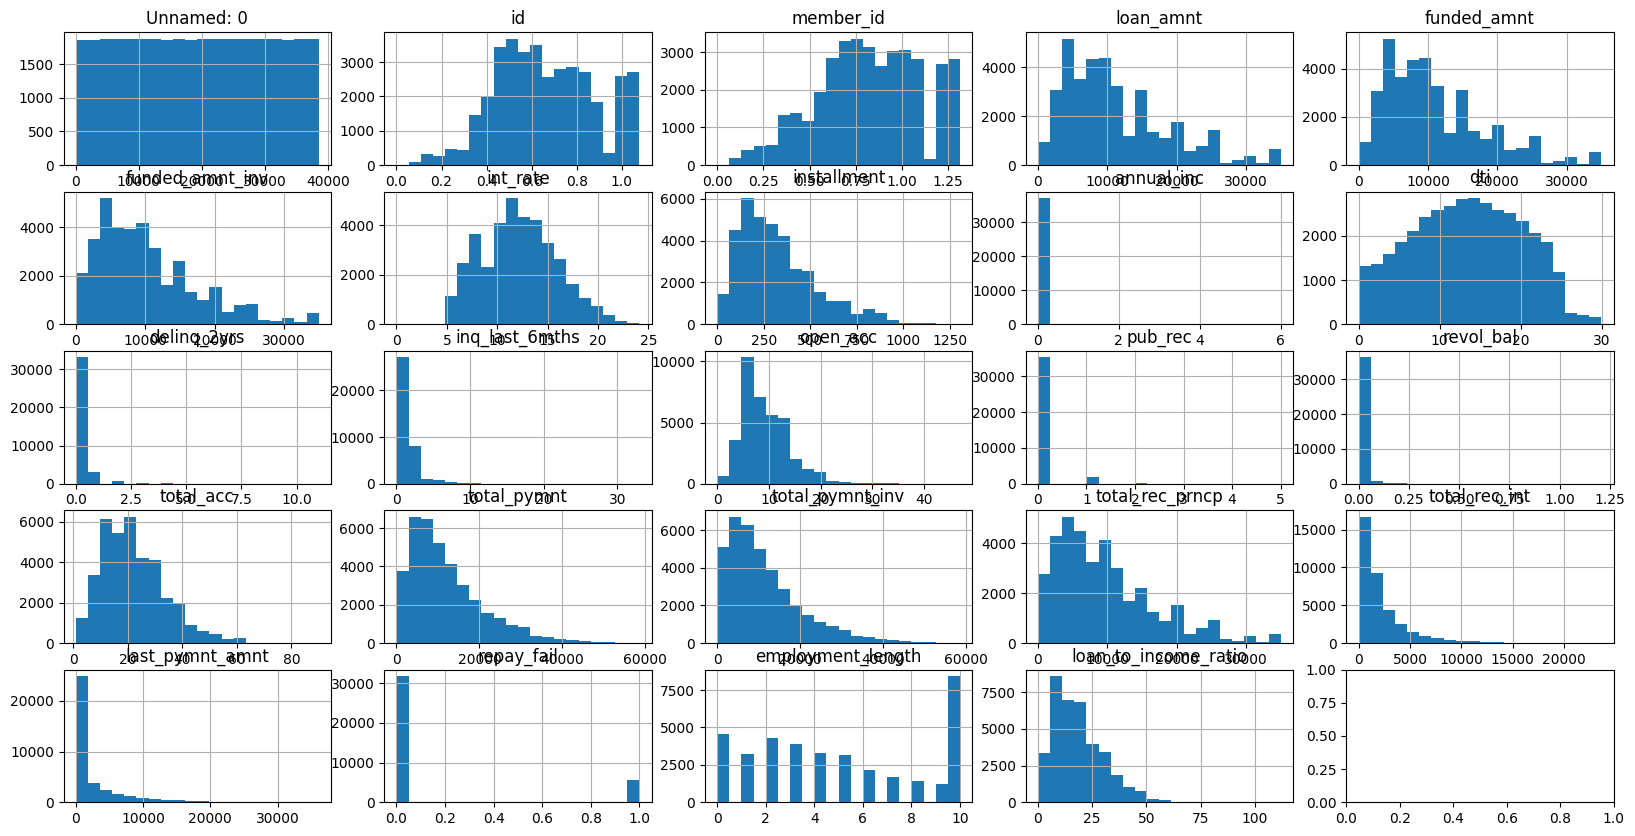

In [257]:
# plotting histograms to visualize patterns in the data

df.hist(figsize = (20,10), bins= 20)
plt.tight_layout()
plt.show()